# CS492: 전산학특강<스마트에너지를 위한 인공지능> 
## Deep Learning Practice 
#### Prof. Ho-Jin Choi
#### School of Computing, KAIST

---

### 2-2. Text classification using IMDB dataset

#### IMDB dataset

The IMDB dataset is for movie reviews as positive or negative using the text of the review. This contains the text of 50,000 movie reviews from the [Internet Movie Database](https://www.imdb.com/). These are split into 25,000 reviews for training and 25,000 reviews for testing. The training and testing sets are balanced, meaning they contain an equal number of positive and negative reviews.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
print('Tensorflow: ', tf.__version__)

import numpy as np
import matplotlib.pyplot as plt

Tensorflow:  2.0.0


To handle the text dataset, We first need to transform the data into a form that can be used for training. There are two common methods, one-hot encoding and word embedding, in this practice, we'll use one-hot encoding method (Word embedding will be covered later in the RNN part). The another reason for using the one-hot encding method is to check the overfitting problem in next practice. 


<img src="images/one_vs_we.png">

Let's first download the IMDB dataset:

In [7]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=NUM_WORDS)

The argument num_words=10000 keeps the top 10,000 most frequently occurring words in the training data. The rare words are discarded to keep the size of the data manageable.

Let's take a moment to understand the format of the data. The dataset comes preprocessed: each example is an array of integers representing the words of the movie review. Each label is an integer value of either 0 or 1, where 0 is a negative review, and 1 is a positive review.

In [8]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
print("Train data[0]: {}. \nlabel[0]: {}".format(train_data[0], train_labels[0]))

Training entries: 25000, labels: 25000
Train data[0]: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]. 
labe

From each data, we'll create an ont-hot encodering vector with a 10,000-dimension

In [9]:
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

NUM_WORDS = 10000

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [5]:
print("Train data[0]: {}. \nlabel[0]: {}".format(train_data[0], train_labels[0]))

Train data[0]: [0. 1. 1. ... 0. 0. 0.]. 
label[0]: 1


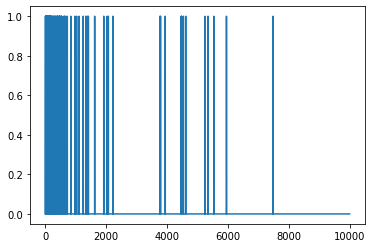

In [10]:
plt.plot(train_data[0])

#### Build model

Similar to previous model, we'll define a simple model using the [`tf.keras.layers.Dense`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/Dense) layer.

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


#### Compile the model

After defining the model structure, we configure the model such as optimizer, loss and metrics for training.

In [12]:
# TODO: compile the model with the following parameters
# - Optimizer: adam optimizer
# - Loss: binary_crossentropy 
# - Metrics: accuracy|
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Create a validation set

When training, we want to check the accuracy of the model on data it hasn't seen before. Create a validation set by setting apart 10,000 examples from the original training data. (Why not use the testing set now? Our goal is to develop and tune our model using only the training data, then use the test data just once to evaluate our accuracy).

In [13]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

#### Train the model

Then, we'll start to train the model.

In [14]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 512
EPOCHS = 20

In [15]:
# TODO: train the model using (train_images, train_labels). 
#       do not forget to set epochs and batch size as the parameters!
model_history = model.fit(partial_x_train,
                          partial_y_train,
                          epochs=EPOCHS,
                          batch_size=BATCH_SIZE,
                          validation_data=(x_val, y_val),
                          verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 108us/sample - loss: 0.5707 - accuracy: 0.7717 - val_loss: 0.4228 - val_accuracy: 0.8581
Epoch 2/20
15000/15000 [==============================] - 1s 50us/sample - loss: 0.3137 - accuracy: 0.8997 - val_loss: 0.3026 - val_accuracy: 0.8831
Epoch 3/20
15000/15000 [==============================] - 1s 51us/sample - loss: 0.2087 - accuracy: 0.9300 - val_loss: 0.2785 - val_accuracy: 0.8878
Epoch 4/20
15000/15000 [==============================] - 1s 51us/sample - loss: 0.1524 - accuracy: 0.9529 - val_loss: 0.2822 - val_accuracy: 0.8859
Epoch 5/20
15000/15000 [==============================] - 1s 51us/sample - loss: 0.1168 - accuracy: 0.9667 - val_loss: 0.2974 - val_accuracy: 0.8831
Epoch 6/20
15000/15000 [==============================] - 1s 51us/sample - loss: 0.0890 - accuracy: 0.9773 - val_loss: 0.3155 - val_accuracy: 0.8821
Epoch 7/20
15000/15000 [==============================]

With this approach our model reaches a validation accuracy of around 88% (note the model is overfitting, training accuracy is significantly higher).

#### Evaluate the model
And let's see how the model performs. Two values will be returned. Loss (a number which represents our error, lower values are better), and accuracy.

In [16]:
results = model.evaluate(test_data, test_labels, verbose=0)

print(results)

[0.7343848959851265, 0.85664]


This fairly naive approach achieves an accuracy of about 87%. With more advanced approaches, the model should get closer to 95%.

#### Plotting network performance trend

In [17]:
history_dict = model_history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

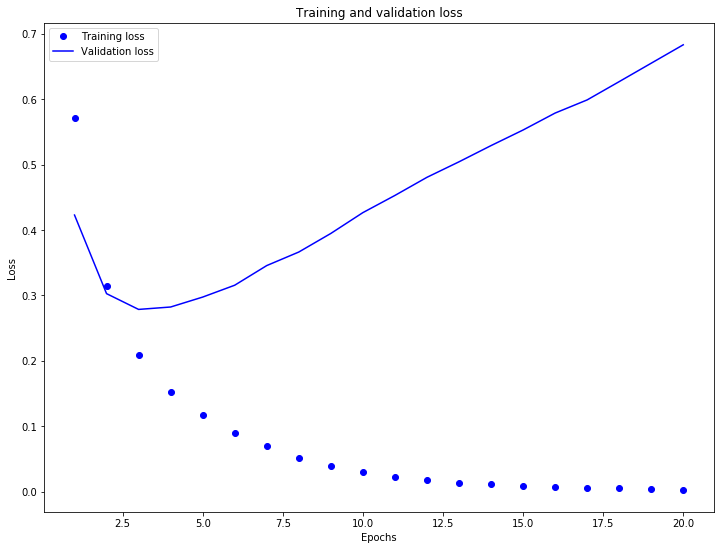

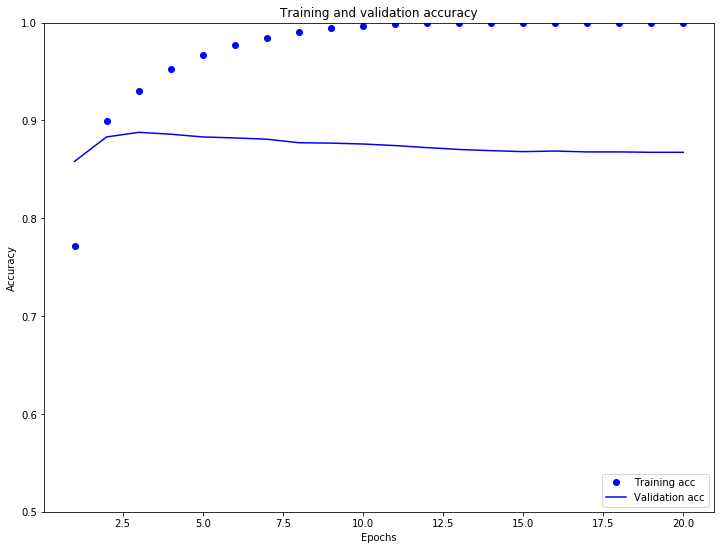

In [18]:
history_dict = model_history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In this plot, the dots represent the training loss and accuracy, and the solid lines are the validation loss and accuracy.

Notice the training loss decreases with each epoch and the training accuracy increases with each epoch. This is expected when using a gradient descent optimization—it should minimize the desired quantity on every iteration.

This isn't the case for the validation loss and accuracy—they seem to peak after about twenty epochs. **This is an example of _overfitting_: the model performs better on the training data than it does on data it has never seen before.** After this point, the model over-optimizes and learns representations specific to the training data that do not generalize to test data.

For this particular case, we could prevent overfitting by simply stopping the training after twenty or so epochs. Later, you'll see how to do this automatically with a callback.